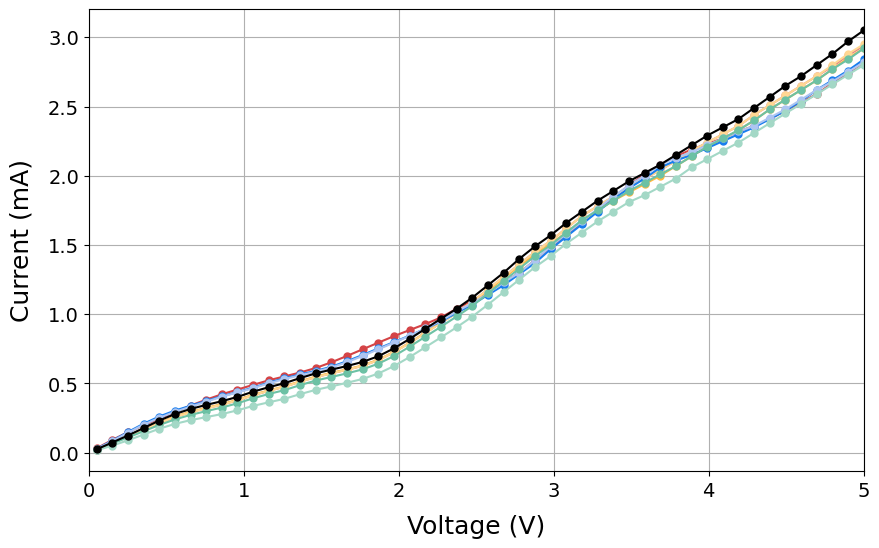

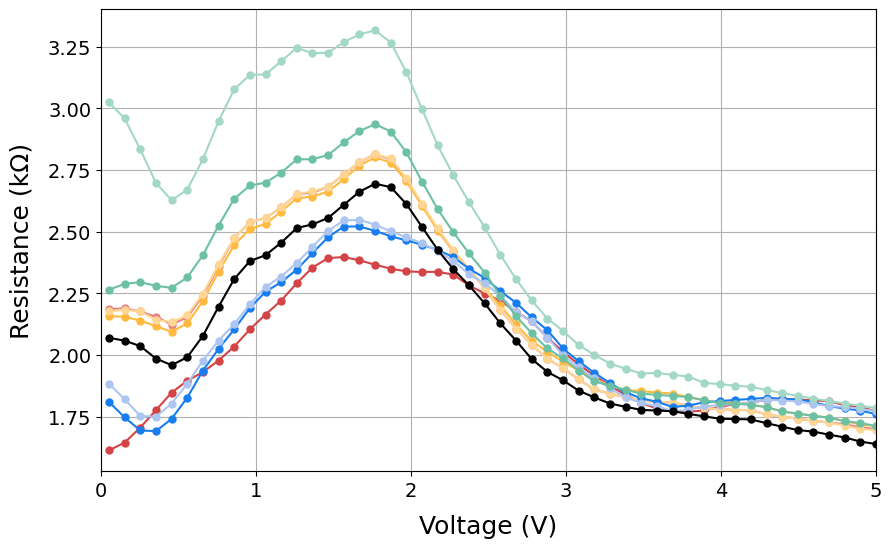

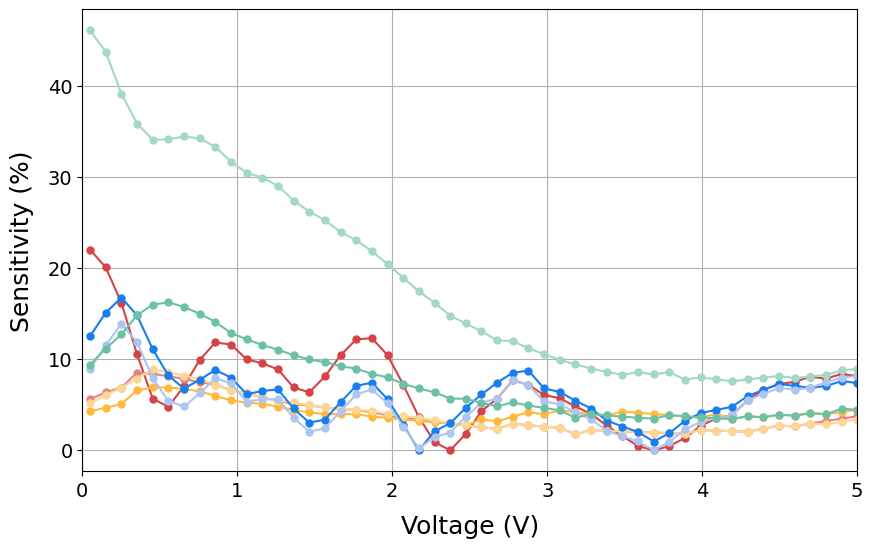

Top 3 local maxima:

Voltage: 0.2525 V
Pristine Resistance: 2.0365 kΩ
O2 Resistance: 1.7063 kΩ
H2O Resistance: 2.1770 kΩ
CO Resistance: 2.1401 kΩ
CO2 Resistance: 2.1770 kΩ
NO Resistance: 1.6948 kΩ
NO2 Resistance: 1.7537 kΩ
SO2 Resistance: 2.2957 kΩ
SO3 Resistance: 2.8342 kΩ

Voltage: 0.8586 V
Pristine Resistance: 2.3080 kΩ
O2 Resistance: 2.0346 kΩ
H2O Resistance: 2.4743 kΩ
CO Resistance: 2.4461 kΩ
CO2 Resistance: 2.4743 kΩ
NO Resistance: 2.1044 kΩ
NO2 Resistance: 2.1252 kΩ
SO2 Resistance: 2.6337 kΩ
SO3 Resistance: 3.0774 kΩ

Voltage: 1.2626 V
Pristine Resistance: 2.5152 kΩ
O2 Resistance: 2.2915 kΩ
H2O Resistance: 2.6526 kΩ
CO Resistance: 2.6360 kΩ
CO2 Resistance: 2.6526 kΩ
NO Resistance: 2.3469 kΩ
NO2 Resistance: 2.3734 kΩ
SO2 Resistance: 2.7934 kΩ
SO3 Resistance: 3.2458 kΩ


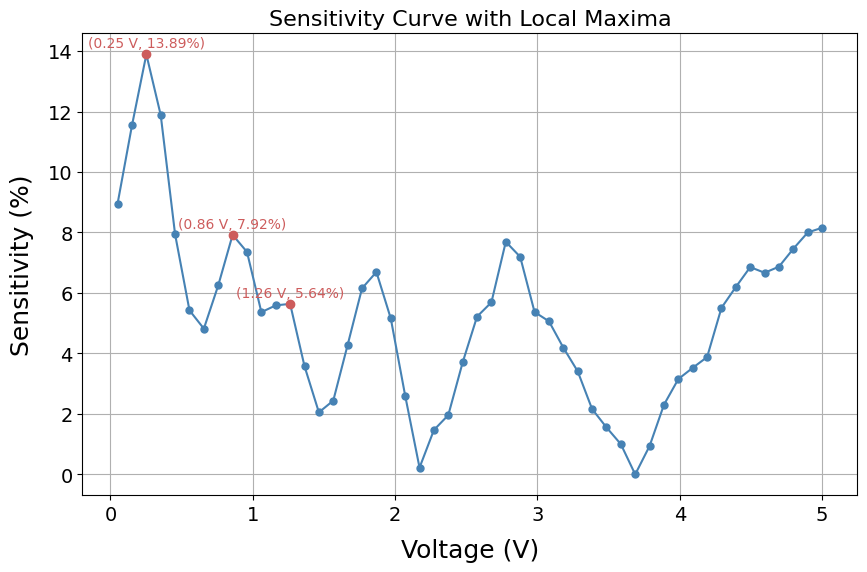

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

df = pd.read_csv("PT_Li.csv")

voltage = df.iloc[:, 0]
pristine_current = df.iloc[:, 1] * 1000
O2_current       = df.iloc[:, 2] * 1000
H2O_current      = df.iloc[:, 3] * 1000
CO_current       = df.iloc[:, 4] * 1000
CO2_current      = df.iloc[:, 5] * 1000
NO_current       = df.iloc[:, 6] * 1000
NO2_current      = df.iloc[:, 7] * 1000
SO2_current      = df.iloc[:, 8] * 1000
SO3_current      = df.iloc[:, 9] * 1000

species = ["Pristine", "O2", "H2O", "CO", "CO2", "NO", "NO2", "SO2", "SO3"]
currents = [pristine_current, O2_current, H2O_current, CO_current, CO2_current, NO_current, NO2_current, SO2_current, SO3_current]

resistances = [np.where(curr == 0, np.nan, voltage / curr) for curr in currents]
R_pristine = np.where(pristine_current == 0, np.nan, voltage / pristine_current)

rgb_list = [
    (212/255,  67/255,  70/255 ),  # O2
    (227/255, 132/255, 134/255 ),  # H2O
    (255/255, 185/255,  63/255 ),  # CO
    (255/255, 215/255, 147/255 ),  # CO2
    ( 24/255, 126/255, 239/255 ),  # NO
    (173/255, 197/255, 241/255 ),  # NO2
    (108/255, 193/255, 164/255 ),  # SO2
    (163/255, 216/255, 198/255 ),  # SO3
]
color_list = ['k'] + rgb_list

#-----------------------------------------
# 1. I-V
plt.figure(figsize=(10,6))

for i in range(1, len(species)):
    plt.plot(voltage, currents[i], label=species[i],
             color=color_list[i],
             marker='o', markersize=5, linestyle='-', linewidth=1.5)
plt.plot(voltage, currents[0], label=species[0],
         color=color_list[0],
         marker='o', markersize=5, linestyle='-', linewidth=1.5, zorder=10)

plt.xlabel("Voltage (V)", fontsize=18, labelpad=10)
plt.ylabel("Current (mA)", fontsize=18, labelpad=10)
plt.xlim(0,5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)
plt.grid(True)
plt.savefig(f"I_V_plot.png", dpi=600, bbox_inches='tight')
plt.show()

#-----------------------------------------
# 2. R-V
plt.figure(figsize=(10,6))
for i in range(1, len(species)):
    R = np.where(currents[i] == 0, np.nan, voltage / currents[i])
    plt.plot(voltage, R, label=species[i],
             color=color_list[i],
             marker='o', markersize=5, linestyle='-', linewidth=1.5)
R_pristine = np.where(currents[0] == 0, np.nan, voltage / currents[0])
plt.plot(voltage, R_pristine, label=species[0],
         color=color_list[0],
         marker='o', markersize=5, linestyle='-', linewidth=1.5, zorder=10)

plt.xlabel("Voltage (V)", fontsize=18, labelpad=10)
plt.ylabel("Resistance (kΩ)", fontsize=18, labelpad=10)
plt.xlim(0,5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)
plt.grid(True)
plt.savefig(f"R_V_plot.png", dpi=600, bbox_inches='tight')
plt.show()

#-----------------------------------------
# 3. Sensitivity
resistances = [np.where(curr == 0, np.nan, voltage / curr) for curr in currents]
R_pristine = np.where(pristine_current == 0, np.nan, voltage / pristine_current)
sensitivities = [100 * abs(R - R_pristine) / R_pristine for R in resistances]

plt.figure(figsize=(10,6))
for i in range(1, len(species)):
    plt.plot(voltage, sensitivities[i], color=color_list[i], label=species[i], marker='o', markersize=5)

plt.xlabel("Voltage (V)", fontsize=18, labelpad=10)
plt.ylabel("Sensitivity (%)", fontsize=18, labelpad=10)
plt.xlim(0,5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)
plt.grid(True)
plt.savefig(f"S_V_plot.png", dpi=600, bbox_inches='tight')
plt.show()

#-----------------------------------------
def find_local_peaks_and_plot(voltage, sensitivity_curve, resistances, R_pristine, species, k=3):
    peaks, _ = find_peaks(sensitivity_curve)

    peak_distances = np.abs(voltage[peaks])

    closest_peaks = peaks[np.argsort(peak_distances)[:k]]

    plt.figure(figsize=(10,6))
    plt.plot(voltage, sensitivity_curve, label="Sensitivity Curve", color="steelblue", marker='o', markersize=5)

    plt.scatter(voltage[closest_peaks], sensitivity_curve[closest_peaks], color='indianred', zorder=10, label='Local Maxima')
    for i in closest_peaks:
        plt.annotate(f'({voltage[i]:.2f} V, {sensitivity_curve[i]:.2f}%)',
                     (voltage[i], sensitivity_curve[i]),
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='indianred')

    print(f"Top {k} local maxima:")
    for i in closest_peaks:
        print(f"\nVoltage: {voltage[i]:.4f} V")
        print(f"Pristine Resistance: {R_pristine[i]:.4f} kΩ")
        for j, species_name in enumerate(species[1:], 1):  # Skip Pristine
            print(f"{species_name} Resistance: {resistances[j][i]:.4f} kΩ")

    plt.xlabel("Voltage (V)", fontsize=18, labelpad=10)
    plt.ylabel("Sensitivity (%)", fontsize=18, labelpad=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title("Sensitivity Curve with Local Maxima", fontsize=16)
    #plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

NO2_sensitivity = sensitivities[6]  # NO2
find_local_peaks_and_plot(voltage, NO2_sensitivity, resistances, R_pristine, species, k=3)
